In [348]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [258]:
Loan = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [259]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [260]:
Loan.shape

(614, 13)

In [261]:
Loan.nunique().to_frame('unique valeus')

,unique valeus
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [262]:
Loan.value_counts().to_frame('counts')

,,,,,,,,,,,,,counts
Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
LP002347,Male,Yes,0,Graduate,No,3246,1417.0,138.0,360.0,1.0,Semiurban,Y,1
LP002345,Male,Yes,0,Graduate,No,1025,2773.0,112.0,360.0,1.0,Rural,Y,1
LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP001674,Male,Yes,1,Not Graduate,No,2600,2500.0,90.0,360.0,1.0,Semiurban,Y,1
LP001673,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,N,1
LP001666,Male,No,0,Graduate,No,8333,3750.0,187.0,360.0,1.0,Rural,Y,1


In [263]:
Loan.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

i discovered a string value in the dependents column which suppose to be integers. i have to remove the + sign after the 3 

In [264]:
Loan['Dependents'] = Loan['Dependents'].str.replace('+','')

In [265]:
Loan.Dependents.unique()

array(['0', '1', '2', '3', nan], dtype=object)

checking the data info again, is still in an object format therefore I have to convert this to float or int

In [266]:
Loan['Dependents']=Loan['Dependents'].astype(float)

In [267]:
Loan['Dependents'].dtypes

dtype('float64')

In [268]:
Loan.Dependents.unique()

array([ 0.,  1.,  2.,  3., nan])

the column is okay in term of data type but still contains null values this will be taking care of later

In [269]:
Loan.shape

(614, 13)

In [270]:
Loan.isnull().sum().to_frame('Number of Null values')

,Number of Null values
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [271]:
for i in Loan:
    if Loan[i].dtypes=='object':
        Loan[i]=Loan[i].fillna(Loan[i].mode()[0])

In [272]:
for i in Loan:
    if Loan[i].dtypes!='object':
        Loan[i]=Loan[i].fillna(Loan[i].mean())

In [273]:
Loan.isnull().sum().to_frame('Number of Null values')

,Number of Null values
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<AxesSubplot:>

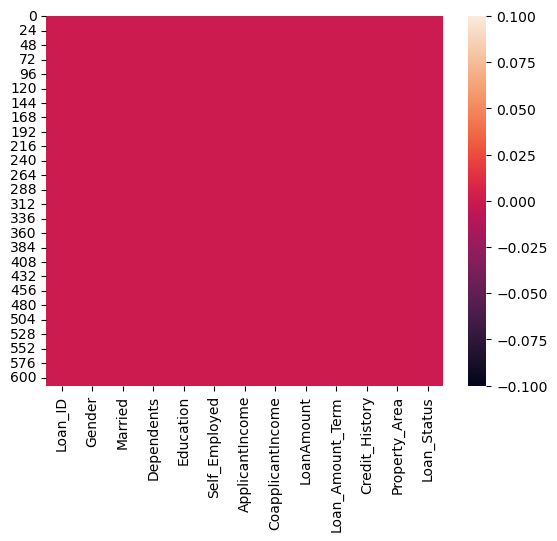

In [274]:
sns.heatmap(Loan.isnull())

In [275]:
for i in Loan:
    if Loan[i].dtypes!='object':
        print(Loan.describe())

       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  614.000000       614.000000         614.000000  614.000000   
mean     0.762938      5403.459283        1621.245798  146.412162   
std      1.002718      6109.041673        2926.248369   84.037468   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.250000   
50%      0.000000      3812.500000        1188.500000  129.000000   
75%      1.000000      5795.000000        2297.250000  164.750000   
max      3.000000     81000.000000       41667.000000  700.000000   

       Loan_Amount_Term  Credit_History  
count        614.000000      614.000000  
mean         342.000000        0.842199  
std           64.372489        0.349681  
min           12.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max          480.000000        1.000000  


In [276]:
Loan.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,1.002718,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


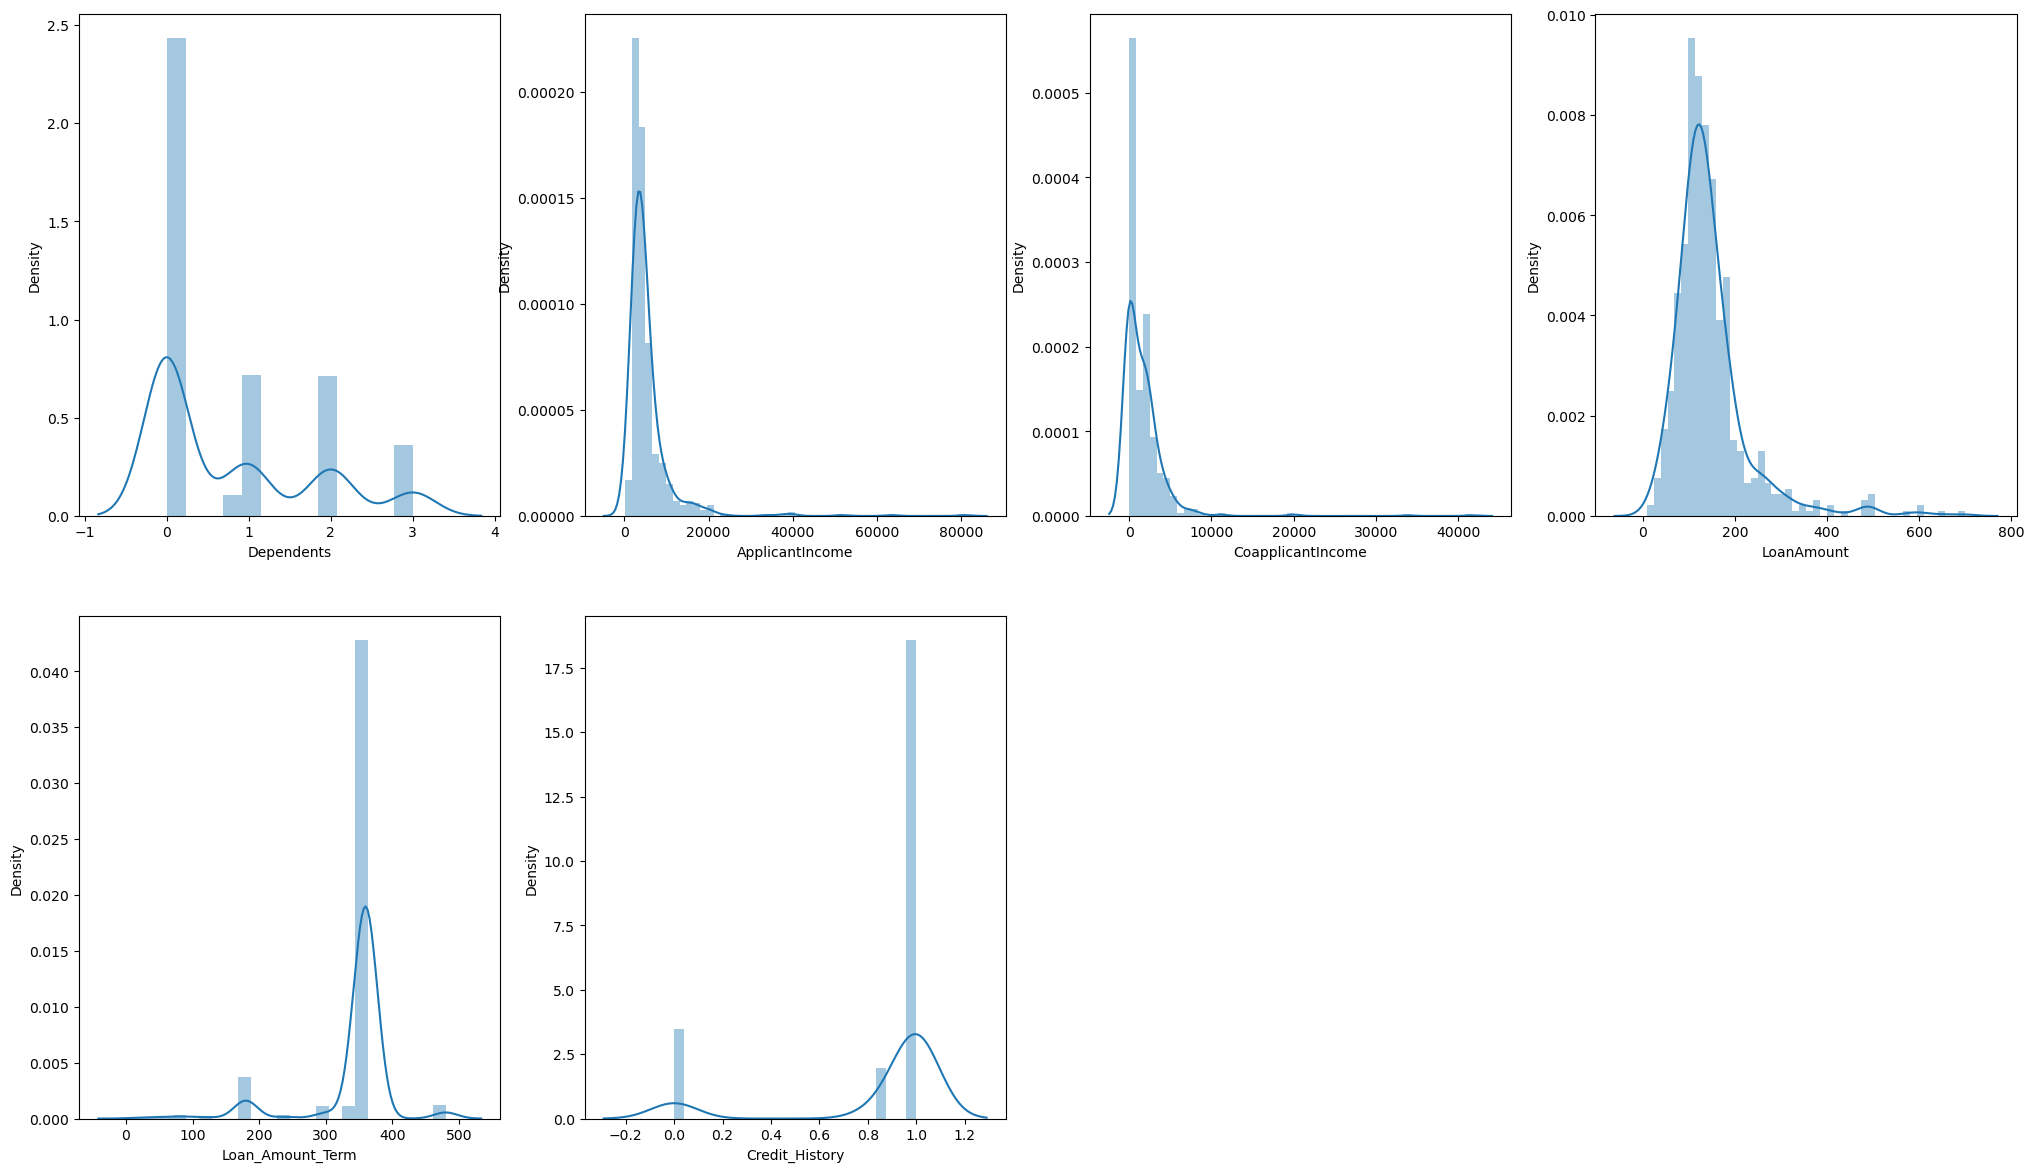

In [277]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Loan.columns:
    if pd.api.types.is_numeric_dtype(Loan[column]):
        if plotnumber<=6:
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(Loan[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

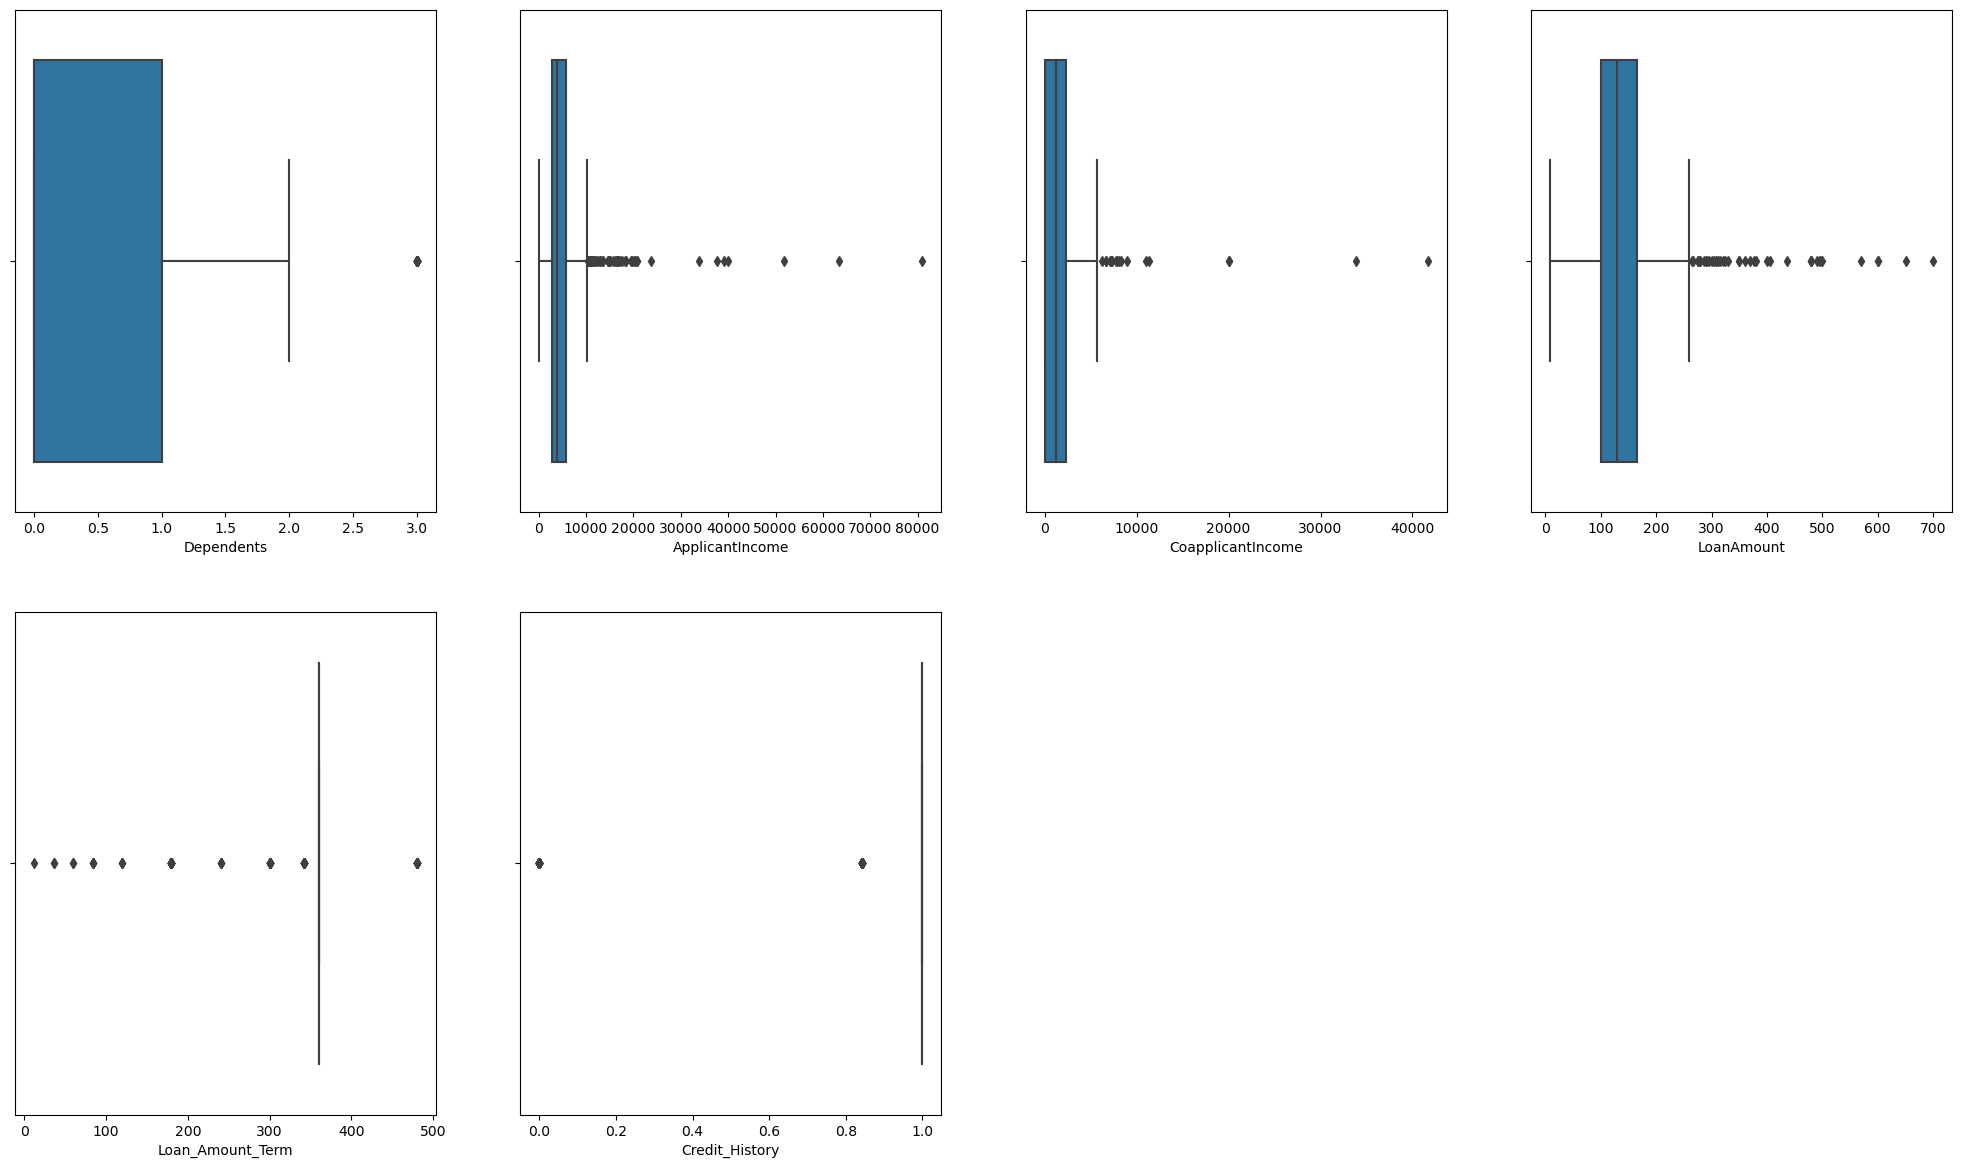

In [280]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Loan.columns:
    if pd.api.types.is_numeric_dtype(Loan[column]):
        if plotnumber<=6:
            ax = plt.subplot(4,4,plotnumber)
            sns.boxplot(Loan[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

In [281]:
Loan.Credit_History.unique()

array([1.        , 0.        , 0.84219858])

In [282]:
Loan.Dependents.unique()

array([0.        , 1.        , 2.        , 3.        , 0.76293823])

In [283]:
from scipy.stats import zscore,boxcox
from scipy import stats

In [284]:
New_Loan = Loan[['Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome', 'ApplicantIncome']]
scores = np.abs(zscore(New_Loan))

In [285]:
New_Loan =Loan[(scores<3).all(axis=1)]
New_Loan.shape

(577, 13)

In [286]:
New_Loan.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
573,610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
574,611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
575,612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [287]:
print('Data Loss:',((Loan.shape[0]-New_Loan.shape[0])/Loan.shape[0])*100)

Data Loss: 6.026058631921824


In [288]:
outliers = Loan[['Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome', 'ApplicantIncome']]

In [289]:
q1 =outliers.quantile(0.25)
q3 = outliers.quantile(0.75)
iqr = q3-q1
Loan1 = Loan[~((Loan<(q1-1.5*iqr))|(Loan>(q3+1.5*iqr))).any(axis=1)]
Loan1.shape
print('Data Loss:',((Loan.shape[0]-Loan1.shape[0])/Loan.shape[0])*100)

Data Loss: 27.524429967426713


In [290]:
Encoder = OrdinalEncoder()
for i in New_Loan.columns:
     if New_Loan[i].dtypes=='object':
        New_Loan[i]=Encoder.fit_transform(New_Loan[i].values.reshape(-1,1))

In [291]:
New_Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [292]:
New_Loan.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

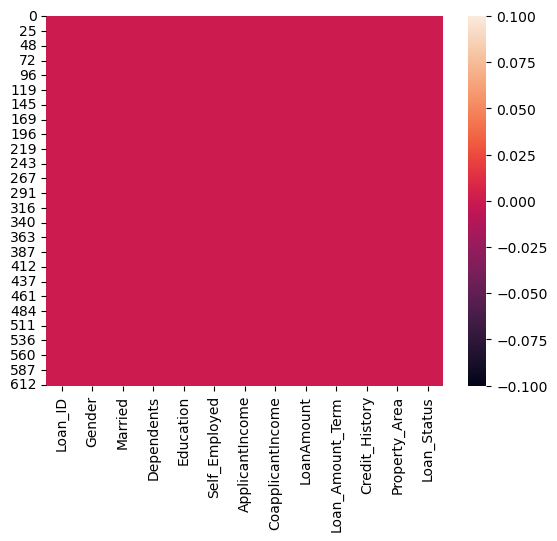

In [293]:
sns.heatmap(New_Loan.isnull())

In [294]:
New_Loan.skew()

Loan_ID              0.000000
Gender              -1.622920
Married             -0.630211
Dependents           1.024159
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [295]:
New_Loan['Loan_Amount_Term']= np.cbrt(New_Loan['Loan_Amount_Term'])
New_Loan['ApplicantIncome']= np.cbrt(New_Loan['ApplicantIncome'])
New_Loan['CoapplicantIncome']= np.cbrt(New_Loan['CoapplicantIncome'])
New_Loan['LoanAmount']= np.cbrt(New_Loan['LoanAmount'])

In [296]:
New_Loan.skew()

Loan_ID              0.000000
Gender              -1.622920
Married             -0.630211
Dependents           1.024159
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -2.557136
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [297]:
New_Loan['ApplicantIncome']= np.sqrt(New_Loan['ApplicantIncome'])
New_Loan['Loan_Amount_Term']= np.sqrt(New_Loan['Loan_Amount_Term'])

In [298]:
New_Loan.skew()

Loan_ID              0.000000
Gender              -1.622920
Married             -0.630211
Dependents           1.024159
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.402441
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -2.646648
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [302]:
correllation = New_Loan.corr()

In [303]:
correllation

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.011887,-0.013677,0.062509,0.053923,0.037935,0.025818,-0.041564,-0.001522,-0.019868,-0.043318,-0.164261,0.023708
Gender,-0.011887,1.000000,0.378997,0.188736,0.045696,-0.006207,0.055097,0.230714,0.173387,-0.103962,0.016566,-0.026340,0.017408
Married,-0.013677,0.378997,1.000000,0.335738,0.024817,-0.015779,-0.022057,0.320626,0.182267,-0.123513,0.013364,0.010595,0.089026
Dependents,0.062509,0.188736,0.335738,1.000000,0.072206,0.045268,0.110522,-0.010811,0.132189,-0.083710,-0.026936,0.010033,0.014100
Education,0.053923,0.045696,0.024817,0.072206,1.000000,-0.007139,-0.177932,0.030281,-0.125819,-0.100793,-0.080920,-0.068596,-0.092658
Self_Employed,0.037935,-0.006207,-0.015779,0.045268,-0.007139,1.000000,0.220587,-0.078584,0.117411,-0.025325,-0.014899,-0.028253,-0.026525
ApplicantIncome,0.025818,0.055097,-0.022057,0.110522,-0.177932,0.220587,1.000000,-0.345960,0.438662,-0.058572,0.037278,-0.012203,-0.003604
CoapplicantIncome,-0.041564,0.230714,0.320626,-0.010811,0.030281,-0.078584,-0.345960,1.000000,0.228319,-0.013523,-0.004059,-0.081866,0.071908
LoanAmount,-0.001522,0.173387,0.182267,0.132189,-0.125819,0.117411,0.438662,0.228319,1.000000,0.056210,-0.007241,-0.094665,-0.028730
Loan_Amount_Term,-0.019868,-0.103962,-0.123513,-0.083710,-0.100793,-0.025325,-0.058572,-0.013523,0.056210,1.000000,0.036202,-0.066056,-0.006570


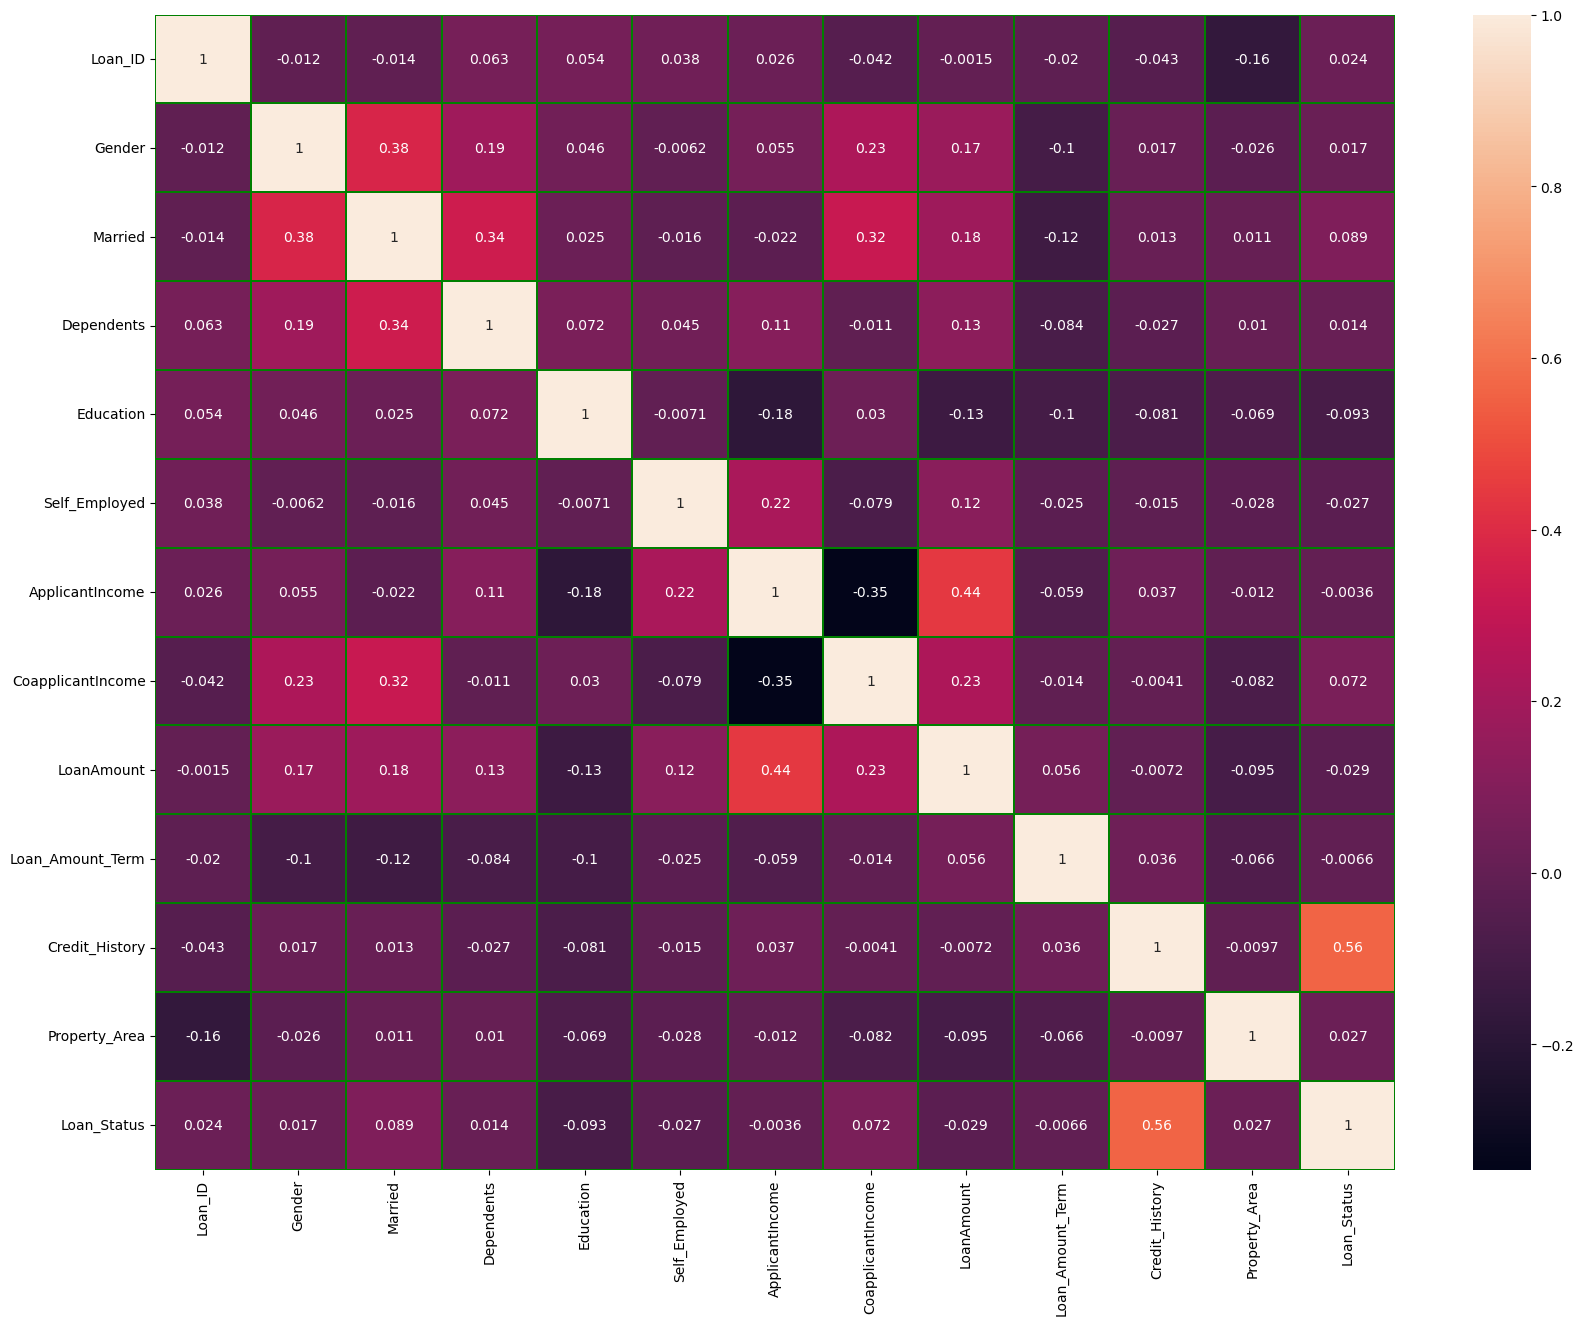

In [304]:
plt.figure(figsize = (20,15))
sns.heatmap(New_Loan.corr(), linewidths = 0.1, fmt = '.2g', linecolor = 'green', annot= True)
plt.yticks(rotation = 0);
plt.show()

In [306]:
correllation['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.561857
Married              0.089026
CoapplicantIncome    0.071908
Property_Area        0.026507
Loan_ID              0.023708
Gender               0.017408
Dependents           0.014100
ApplicantIncome     -0.003604
Loan_Amount_Term    -0.006570
Self_Employed       -0.026525
LoanAmount          -0.028730
Education           -0.092658
Name: Loan_Status, dtype: float64

In [307]:
Features = New_Loan.drop(columns = ['Loan_Status'])
Label = New_Loan['Loan_Status']

In [ ]:
from collections import Counter as C
C(Temperature['Loan_Status'])


In [308]:
scaler = StandardScaler()
Features = pd.DataFrame(scaler.fit_transform(Features),columns = Features.columns)
Features

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.729052,0.477137,-1.362511,-0.748497,-0.541961,-0.380580,0.662573,-1.093504,0.318405,0.262475,0.456461,1.227472
1,-1.723048,0.477137,0.733939,0.264257,-0.541961,-0.380580,0.205108,0.596681,-0.012836,0.262475,0.456461,-1.306522
2,-1.717044,0.477137,0.733939,-0.748497,-0.541961,2.627567,-0.546713,-1.093504,-1.445145,0.262475,0.456461,1.227472
3,-1.711041,0.477137,0.733939,-0.748497,1.845150,-0.380580,-0.799812,0.868268,-0.166705,0.262475,0.456461,1.227472
4,-1.705037,0.477137,-1.362511,-0.748497,-0.541961,-0.380580,0.711459,-1.093504,0.224069,0.262475,0.456461,1.227472
...,...,...,...,...,...,...,...,...,...,...,...,...
572,1.705037,-2.095835,-1.362511,-0.748497,-0.541961,-0.380580,-0.604600,-1.093504,-1.302297,0.262475,0.456461,-1.306522
573,1.711041,0.477137,0.733939,2.289765,-0.541961,-0.380580,0.004982,-1.093504,-2.336409,-3.388846,0.456461,-1.306522
574,1.717044,0.477137,0.733939,0.264257,-0.541961,-0.380580,1.295942,-0.177556,1.830577,0.262475,0.456461,1.227472
575,1.723048,0.477137,0.733939,1.277011,-0.541961,-0.380580,1.170397,-1.093504,0.960923,0.262475,0.456461,1.227472


In [309]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns
vif

,vif values,features
0,1.040642,Loan_ID
1,1.221513,Gender
2,1.408940,Married
3,1.184403,Dependents
4,1.075686,Education
5,1.056250,Self_Employed
6,1.795775,ApplicantIncome
7,1.605018,CoapplicantIncome
8,1.614313,LoanAmount
9,1.060776,Loan_Amount_Term


In [310]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
Features1,Label1 = SM.fit_resample(Features,Label)

In [311]:
Label1.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [313]:
x_train,x_test,y_train,y_test = train_test_split(Features1,Label1, test_size = 0.25, random_state = 150)

In [314]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n_____________________train result_____________________')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)}')
    elif train==False:
        pred = clf.predict(x_test)
        print('\n_____________________train result_____________________')
        print(f'accuracy score: {accuracy_score(y_test,pred)}')
        print('*\n   \n test classification report \n',classification_report(y_test,pred,digits=2))

In [315]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [316]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


_____________________train result_____________________
accuracy score: 0.8659966499162479

_____________________train result_____________________
accuracy score: 0.7437185929648241
*
   
 test classification report 
               precision    recall  f1-score   support

         0.0       0.73      0.78      0.75        99
         1.0       0.76      0.71      0.74       100

    accuracy                           0.74       199
   macro avg       0.74      0.74      0.74       199
weighted avg       0.75      0.74      0.74       199



In [317]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc = bc.predict(x_test)
pred_train = bc.predict(x_train)
print ('accuracy score:', accuracy_score(y_test,pred_bc))
print ('confusion matrix:', confusion_matrix(y_test,pred_bc))
print ('classification report:', classification_report(y_test,pred_bc))

accuracy score: 0.8140703517587939
confusion matrix: [[87 12]
 [25 75]]
classification report:               precision    recall  f1-score   support

         0.0       0.78      0.88      0.82        99
         1.0       0.86      0.75      0.80       100

    accuracy                           0.81       199
   macro avg       0.82      0.81      0.81       199
weighted avg       0.82      0.81      0.81       199



In [318]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc = gbc.predict(x_test)
pred_train = gbc.predict(x_train)
print ('accuracy score:', accuracy_score(y_test,pred_gbc))
print ('confusion matrix:', confusion_matrix(y_test,pred_gbc))
print ('classification report:', classification_report(y_test,pred_gbc))

accuracy score: 0.8291457286432161
confusion matrix: [[82 17]
 [17 83]]
classification report:               precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        99
         1.0       0.83      0.83      0.83       100

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199



In [319]:
cross_val_score(knn,Features1,Label1,cv=5)

array([0.725     , 0.63522013, 0.81132075, 0.77987421, 0.77358491])

In [321]:
cross_val_score(knn,Features1,Label1,cv=5).mean()

0.7449999999999999

In [322]:
cross_val_score(bc,Features1,Label1,cv=5)
cross_val_score(bc,Features1,Label1,cv=5).mean()

0.4233962264150944

In [323]:
cross_val_score(gbc,Features1,Label1,cv=5)
cross_val_score(gbc,Features1,Label1,cv=5).mean()

0.39075471698113207

In [324]:
from sklearn.model_selection import GridSearchCV

In [339]:
params_grid = {'n_estimators':[20,56,70,150],
             'max_features': [1.0,2.0,5.0,8.0],
             'bootstrap':[True, False],
             'max_samples':[1.0,2.0,5.0,8.0],
              'warm_start':[True,False]
             }

In [340]:
grid_search =GridSearchCV(estimator=bc, param_grid = params_grid, cv = 5)


In [341]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1.0, 2.0, 5.0, 8.0],
                         'max_samples': [1.0, 2.0, 5.0, 8.0],
                         'n_estimators': [20, 56, 70, 150],
                         'warm_start': [True, False]})

In [342]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'bootstrap': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 150, 'warm_start': True}


In [344]:
bc_final = BaggingClassifier(n_estimators = 150, bootstrap= True, max_features= 1.0, max_samples =1.0, warm_start = True)

In [345]:
bc_final

BaggingClassifier(n_estimators=150, warm_start=True)

In [347]:
bc_final.fit(x_train,y_train)
my_prediction = bc_final.predict(x_test)
accuraccy = accuracy_score(y_test,my_prediction)
print(accuraccy*100)

83.41708542713567


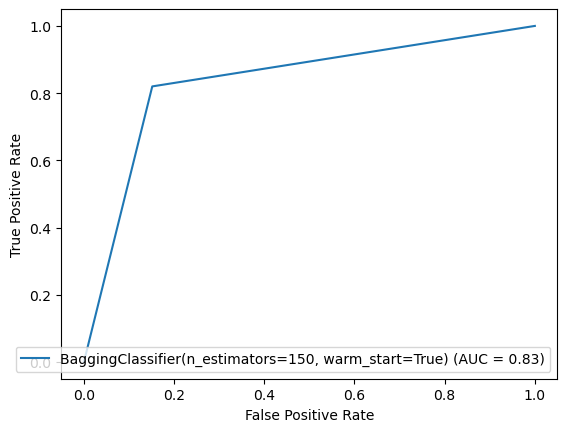

In [349]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,my_prediction)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = bc_final)
display.plot()

In [350]:
import pickle
import joblib
joblib.dump(bc_final,'Loan_Approver_prediction.pkl')

['Loan_Approver_prediction.pkl']

In [351]:
model = joblib.load('Loan_Approver_prediction.pkl')
prediction = model.predict(x_test)
prediction

array([1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

* This is a loan application status data where I am require to build a model that predict the loan of the applicant will be approved or not
* The Label/target variable is the Loan Status. 
* The dataset consist of 614 entries in 13 columns
* The dataset is of two data type. object and float 64 data type.
* I convert the object data type in dependent column to float as this suppose to be a float data type.
* I proceed by filling all the null values with mean and mode method accordingly.
* I remove the skewness by using the cuberoot method and check for the correlation.
* I standardise the data and took the vif.
* I balance the target data by SMOTE method, I then separate the target variables from the features.
* Because it is classification problem so i used GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier and KNeighborsClassifier.
* Because the BaggingClassifier gives the least cross validation score I then applied hyper parameter tunning and choose it as my best model for this project.